## TEST SCORES DATASET

This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Analytic Questions

The questions answered by this dataset primarily include the relationship between different variables and the effect on the outcome of students' scores. 

##### Question 1:
Does parental educational attainment affect the students' test scores?

##### Answer 1:
Yes, the higher the parent's level of education correlates with a higher score level on the test. Students with parents that only have high school eductation (lowest level of educational attainment) had significantly lower average scores than those with parents with Masters Degrees. The level of education relates in lockstep with the scores achieved.

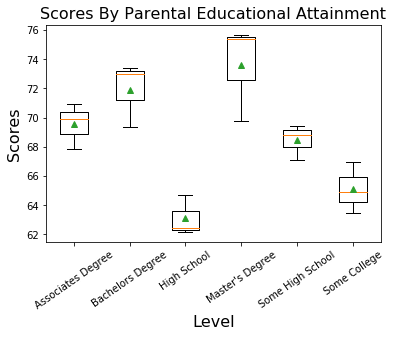

In [2]:
parents_education = data.groupby('parental level of education')
education_score = parents_education.aggregate(np.mean)
plt.boxplot(education_score,showmeans=True)
plt.title('Scores By Parental Educational Attainment',fontsize=16)
plt.xlabel('Level',fontsize=16)
plt.ylabel('Scores',fontsize=16)
plt.xticks([3, 1, 2, 4, 5, 6], ['High School','Associates Degree', 'Bachelors Degree', 'Master\'s Degree', 'Some High School', 'Some College'],rotation=35)
plt.show()

##### Question 2:
Does the students' race/ethnicity affect the test score?

##### Answer 2:
There is overwhelming evidence that race/ethnicity affects the student's test scores. Group A had the lowest average test scores while Group E had the highest average test scores. Group C had the greatest range of test scores.

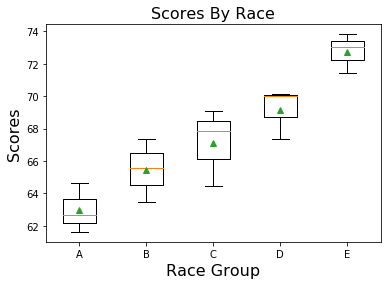

In [3]:
race = data.groupby('race/ethnicity')
race_means = race.aggregate(np.mean)
plt.boxplot(race_means,showmeans=True)
plt.title('Scores By Race', fontsize=16)
plt.xlabel('Race Group', fontsize=16)
plt.ylabel('Scores', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'],rotation='horizontal')
plt.show()

##### Question 3:
Does a test preparation course affect students' outcomes for test taking?

##### Answer 3:
Shown in the histograms below, the test scores were higher for students that took prepatory course than those who did not complete a test prep course. Shown in red are the students who did NOT take a prep course, and in green are those that did take a prepatory course.  

The mean score for those taking a prep course was __22.9__ points __(or 7.64%)__ higher than those students that did not take a prep course. These are shown in the green and red dotted lines in the histogram below.

In [4]:
df=pd.read_csv('StudentsPerformance.csv')
df['total score']=df['math score']+df['reading score']+df['writing score'] 

22.891557458361632

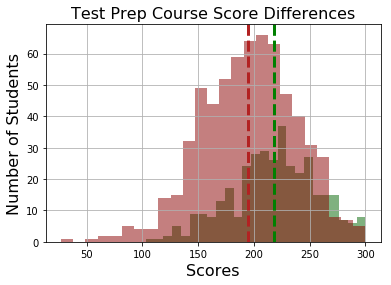

In [5]:
test_prep = data.groupby('test preparation course')
prep_total_score= df[df['test preparation course']=='completed'][['test preparation course','total score']]
noprep_total_score= df[df['test preparation course']=='none'][['test preparation course','total score']]

prep_score = test_prep.aggregate(np.mean)

total_score_noprep = noprep_total_score['total score']
total_score_prep = prep_total_score['total score']

total_score_prep.hist(bins=25, alpha=0.5,color='darkgreen')
prep_line=plt.axvline(total_score_prep.mean(), color='green', linestyle='dashed', linewidth=3)
total_score_noprep.hist(bins=25, alpha=0.5, color = 'darkred')
noprep_line=plt.axvline(total_score_noprep.mean(), color='firebrick', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Test Prep Course Score Differences', fontsize=16)
prep_diff=total_score_prep.mean()-total_score_noprep.mean()
prep_diff

In [6]:
prep_diff=total_score_prep.mean()-total_score_noprep.mean()
prep_diff/300*100

7.63051915278721

##### Question 4:
Does the lunch paid for by the student (which is a proxy for __socioeconomic level__) affect the score achieved?

##### Answer 4:
The mean test score for "richer" students was __25.9__ points __(or 8.64%)__ _higher_ than "poorer" students. These are shown in the dark blue (rich) and grey (poor) dotted lines in the histogram below.

This economic difference is a huge factor in the student's performance on the test.

25.914444808385184

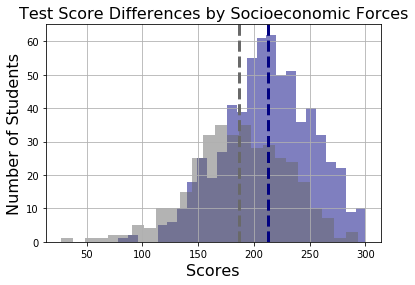

In [7]:
rich_total_score= df[df['lunch']=='standard'][['lunch','total score']]
poor_total_score= df[df['lunch']=='free/reduced'][['lunch','total score']]

total_score_rich=rich_total_score['total score']
total_score_poor=poor_total_score['total score']

total_score_rich.hist(bins=25, alpha=0.5,color='navy')
plt.axvline(total_score_rich.mean(), color='navy', linestyle='dashed', linewidth=3)
total_score_poor.hist(bins=25, alpha=0.5, color = 'dimgrey')
plt.axvline(total_score_poor.mean(), color='dimgrey', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Test Score Differences by Socioeconomic Forces', fontsize=16)

econ_diff=total_score_rich.mean()-total_score_poor.mean()
econ_diff

In [8]:
econ_diff/300*100

8.638148269461727

##### Question 5:
Are females really more intelligent than males?

##### Answer 5:
Females scored higher, on average, in this sample than males did on a total basis. Gender is the least explanatory factor in determining student's performance.

Below are the test scores divided into the different sections. 

The mean score for females was __11.2__ points __(or 3.73%)__ higher than male students . These are shown in the pink (females) and blue (males) dotted lines in the histogram below.

11.196046075714122

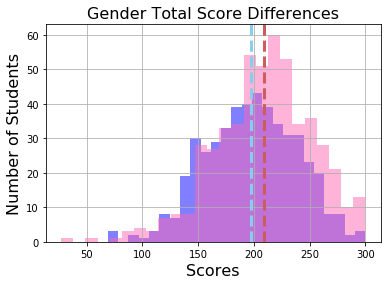

In [9]:
male_total_score= df[df['gender']=='male'][['gender','total score']]
female_total_score= df[df['gender']=='female'][['gender','total score']]

total_score_male=male_total_score['total score']
total_score_female=female_total_score['total score']

total_score_male.hist(bins=25, alpha=0.5,color='b')
plt.axvline(total_score_male.mean(), color='skyblue', linestyle='dashed', linewidth=3)
total_score_female.hist(bins=25, alpha=0.5, color = 'hotpink')
plt.axvline(total_score_female.mean(), color='indianred', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Gender Total Score Differences', fontsize=16)
gender_diff=total_score_female.mean()-total_score_male.mean()
gender_diff

In [10]:
gender_diff/300*100

3.7320153585713745

##### Question 5a:
How do females and males do in math in this sample?

##### Answer 5a:
The mean MATH score for females was __5.1__ points __(or 1.7%)__ _lower_ than male students. These are shown in the pink (females) and blue (males) dotted lines in the histogram below.

Not a huge difference.

-5.095011134430216

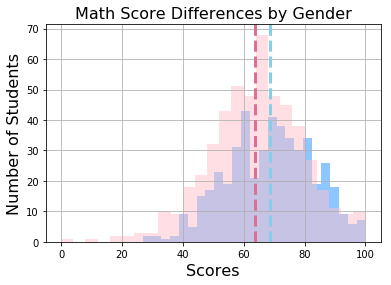

In [11]:
male_math_score= data[data['gender']=='male'][['gender','math score']]
female_math_score= data[data['gender']=='female'][['gender','math score']]

math_score_male=male_math_score['math score']
math_score_female=female_math_score['math score']

math_score_male.hist(bins=25, alpha=0.5,color='dodgerblue')
plt.axvline(math_score_male.mean(), color='skyblue', linestyle='dashed', linewidth=3)
math_score_female.hist(bins=25, alpha=0.5, color = 'pink')
plt.axvline(math_score_female.mean(), color='palevioletred', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Math Score Differences by Gender', fontsize=16)


math_diff=math_score_female.mean()-math_score_male.mean()
math_diff

In [12]:
math_diff/300*100

-1.698337044810072

##### Question 5b:
How do females and males do in reading in this sample?

##### Answer 5b:
The mean READING score for females was __7.14__ points __(or 2.38%)__ _higher_ than male students. These are shown in the pink (females) and blue (males) dotted lines in the histogram below.

Females read better than males. Probably right... but the sample size is small.

7.135079062464953

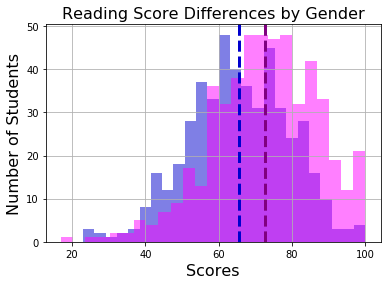

In [13]:
male_reading_score= data[data['gender']=='male'][['gender','reading score']]
female_reading_score= data[data['gender']=='female'][['gender','reading score']]

reading_score_male=male_reading_score['reading score']
reading_score_female=female_reading_score['reading score']

reading_score_male.hist(bins=25, alpha=0.5,color='mediumblue')
plt.axvline(reading_score_male.mean(), color='mediumblue', linestyle='dashed', linewidth=3)
reading_score_female.hist(bins=25, alpha=0.5, color = 'fuchsia')
plt.axvline(reading_score_female.mean(), color='purple', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Reading Score Differences by Gender', fontsize=16)

reading_diff=reading_score_female.mean()-reading_score_male.mean()
reading_diff

In [14]:
reading_diff/300*100

2.3783596874883175

##### Question 5c:
How do females and males do in writing in this sample?

##### Answer 5c:
The mean WRITING score for females was __9.16__ points __(or 3.05%)__ _higher_ than male students. These are shown in the pink (females) and blue (males) dotted lines in the histogram below.

9.155978147679384

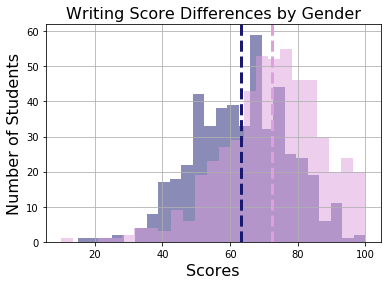

In [15]:
male_writing_score= data[data['gender']=='male'][['gender','writing score']]
female_writing_score= data[data['gender']=='female'][['gender','writing score']]

writing_score_male=male_writing_score['writing score']
writing_score_female=female_writing_score['writing score']

writing_score_male.hist(bins=25, alpha=0.5,color='midnightblue')
plt.axvline(writing_score_male.mean(), color='midnightblue', linestyle='dashed', linewidth=3)
writing_score_female.hist(bins=25, alpha=0.5, color = 'plum')
plt.axvline(writing_score_female.mean(), color='plum', linestyle='dashed', linewidth=3)
plt.xlabel("Scores", fontsize=16)  
plt.ylabel("Number of Students", fontsize=16)
plt.title('Writing Score Differences by Gender', fontsize=16)

writing_diff=writing_score_female.mean()-writing_score_male.mean()
writing_diff

In [16]:
writing_diff/300*100

3.051992715893128